# Task 1: Data Exploration and Enrichment

## Objective
Understand the starter dataset and enrich it with additional data points useful for forecasting financial inclusion in Ethiopia.

## Environment Setup

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set file paths
data_path = "../data/raw/ethiopia_fi_unified_data.csv"
ref_codes_path = "../data/raw/reference_codes.csv"
impact_links_path = "../data/raw/impact_links.csv"
output_dir = "../reports/figures"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load data
data_df = pd.read_csv(data_path)
impact_links_df = pd.read_csv(impact_links_path)
ref_codes_df = pd.read_csv(ref_codes_path)

print("Data loaded successfully.")

Data loaded successfully.


## 1. Schema Understanding
Reviewing the distribution of records across broad categories.

C:\Users\dell\AppData\Local\Temp\ipykernel_31816\1742017232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x='record_type', palette='viridis')


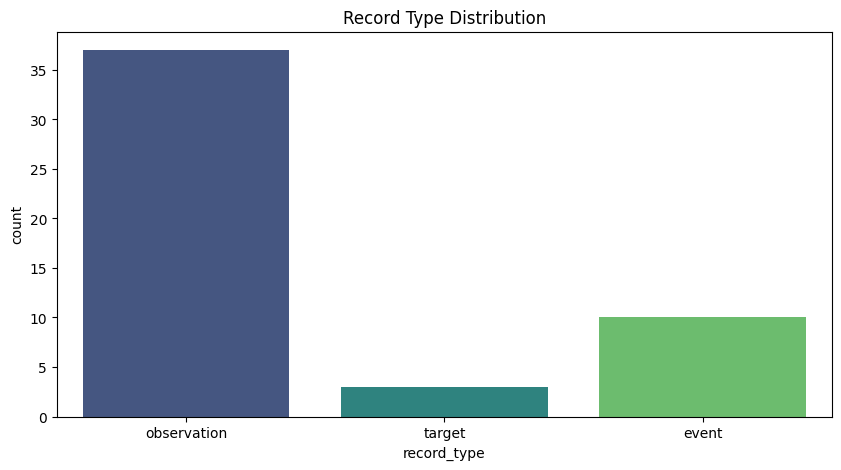

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data_df, x='record_type', palette='viridis')
plt.title('Record Type Distribution')
plt.savefig(os.path.join(output_dir, 'task1_record_type_dist.png'))
plt.show()

## 2. Pillar Analysis
Understanding the focus areas (Access, Usage, etc.) of the current dataset.

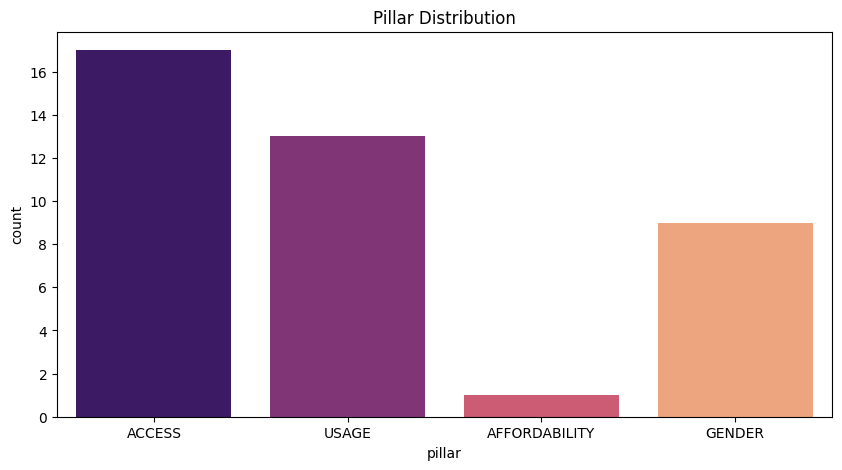

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data_df, x='pillar', palette='magma', hue='pillar', legend=False)
plt.title('Pillar Distribution')
plt.savefig(os.path.join(output_dir, 'task1_pillar_dist.png'))
plt.show()

## 3. Temporal Range Identification
Establishing the timeline of observations.

In [25]:
data_df['observation_date'] = pd.to_datetime(data_df['observation_date'], errors='coerce')
obs_dates = data_df[data_df['record_type'] == 'observation']['observation_date'].dropna()
print(f"Temporal Range: {obs_dates.min().year} to {obs_dates.max().year}")

Temporal Range: 2014 to 2025


## 4. Source Type Analysis
Analyzing where our data comes from.

C:\Users\dell\AppData\Local\Temp\ipykernel_31816\30561720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x='source_type', palette='mako')


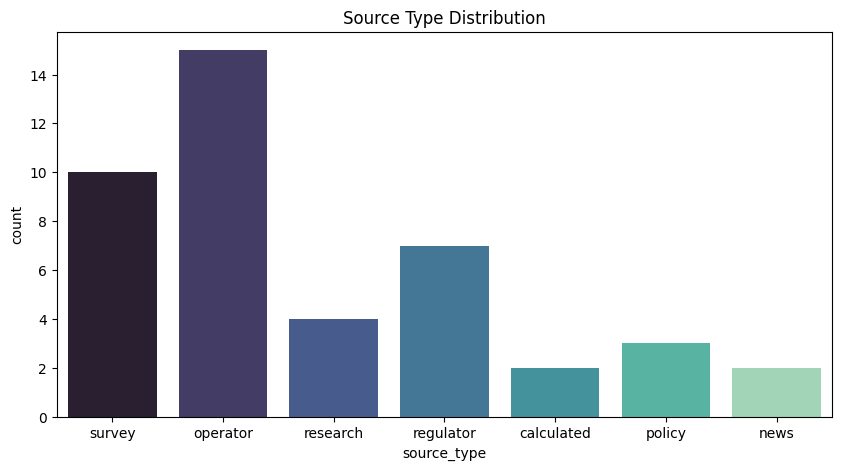

In [26]:
if 'source_type' in data_df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_df, x='source_type', palette='mako')
    plt.title('Source Type Distribution')
    plt.savefig(os.path.join(output_dir, 'task1_source_type_dist.png'))
    plt.show()
else:
    print("Column 'source_type' not found. Displaying unique sources instead:")
    print(data_df['source_name'].unique())

## 5. Confidence Level Analysis
Evaluating the reliability of the data.

C:\Users\dell\AppData\Local\Temp\ipykernel_31816\2526531863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_df, x='confidence', palette='rocket', order=['high', 'medium', 'low'])


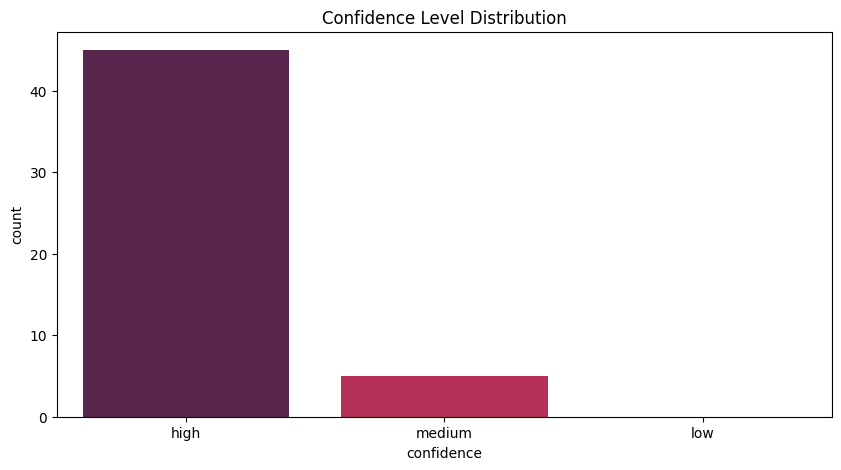

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data_df, x='confidence', palette='rocket', order=['high', 'medium', 'low'])
plt.title('Confidence Level Distribution')
plt.savefig(os.path.join(output_dir, 'task1_confidence_dist.png'))
plt.show()

## 6. Indicator Coverage Analysis (MOST IMPORTANT)
Visualizing data density across indicators and time. This helps identify gaps for forecasting.

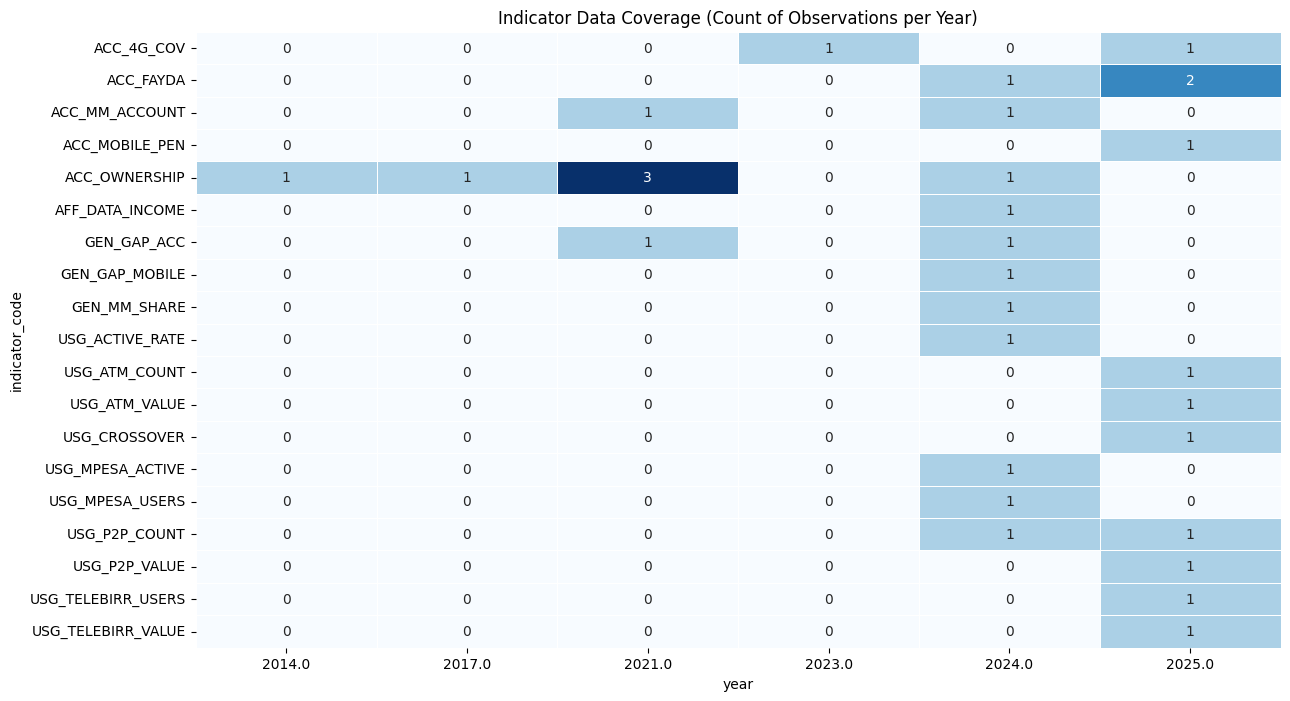

In [28]:
obs_df = data_df[data_df['record_type'] == 'observation'].copy()
obs_df['year'] = obs_df['observation_date'].dt.year
coverage_matrix = obs_df.pivot_table(index='indicator_code', columns='year', values='value_numeric', aggfunc='count').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(coverage_matrix, annot=True, cbar=False, cmap='Blues', linewidths=.5)
plt.title('Indicator Data Coverage (Count of Observations per Year)')
plt.savefig(os.path.join(output_dir, 'task1_indicator_coverage.png'))
plt.show()

## 7. Impact Links Analysis
Reviewing how events affect specific indicators according to the schema.

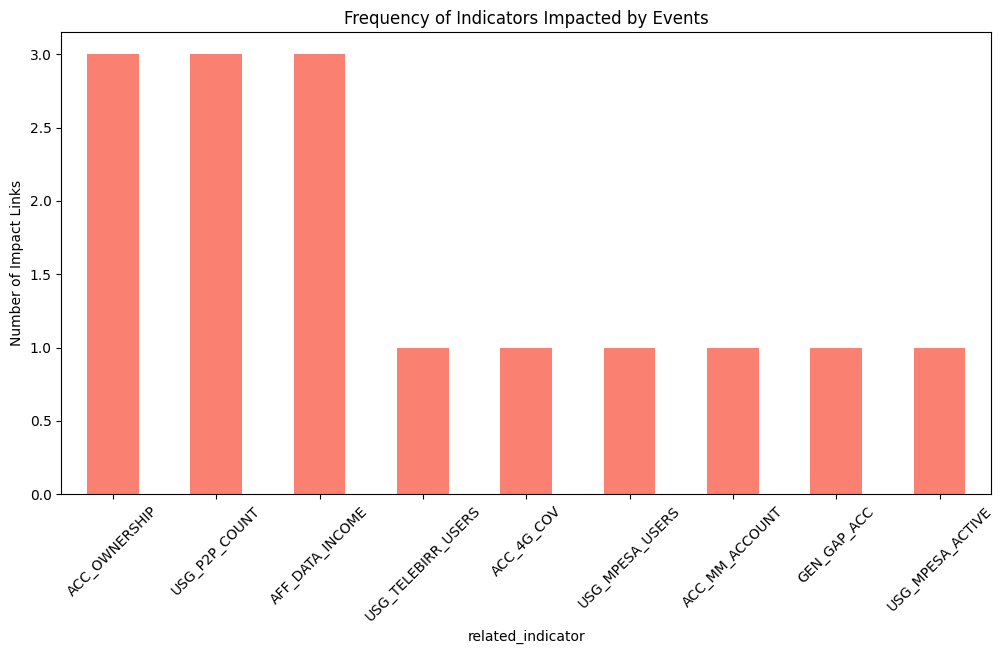

In [29]:
if not impact_links_df.empty:
    impact_counts = impact_links_df['related_indicator'].value_counts()
    plt.figure(figsize=(12, 6))
    impact_counts.plot(kind='bar', color='salmon')
    plt.title('Frequency of Indicators Impacted by Events')
    plt.ylabel('Number of Impact Links')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(output_dir, 'task1_impact_analysis.png'))
    plt.show()
else:
    print("No impact links present to analyze.")

## 8. Enrichment Summary
Verifying the added data points (Gender disaggregation, 2024 Operator metrics).

In [30]:
new_codes = ['GEN_GAP_ACC', 'USG_TELEBIRR_USERS', 'USG_MPESA_USERS']
display(data_df[data_df['indicator_code'].isin(new_codes)][['indicator', 'value_numeric', 'observation_date', 'notes']])

,indicator,value_numeric,observation_date,notes
20,Telebirr Registered Users,54840000.0,2025-06-30,NaN
22,M-Pesa Registered Users,10800000.0,2024-12-31,NaN
26,Account Ownership Gender Gap,20.0,2021-12-31,NaN
27,Account Ownership Gender Gap,18.0,2024-11-29,NaN
44,"Account Ownership (Male, 2021)",56.0,NaT,Disaggregated 2021 data.
45,"Account Ownership (Female, 2021)",36.0,NaT,Disaggregated 2021 data.
46,"Account Ownership (Male, 2024)",57.0,NaT,Estimated gender gap in 2024.
47,"Account Ownership (Female, 2024)",42.0,NaT,Estimated gender gap in 2024.
48,Telebirr Total Users (2024),54.0,NaT,Latest Telebirr user count.
49,M-Pesa Total Users (2024),10.0,NaT,Latest M-Pesa user count.
